In [144]:
#librairie pandas
import pandas as pd
#librairie numpy
import numpy as np
#librairie matplotlib
import matplotlib.pyplot as plt
#scikit-learn
import sklearn
#librairie scikit-learn: classe pour standardisation
from sklearn.preprocessing import StandardScaler
#librairie scikit-learn: classe pour l'ACP
from sklearn.decomposition import PCA


In [145]:
#Charger les données du fichier csv dans une trame de données pandas
df = pd.read_csv('data.csv')
df

,Unnamed: 0,Indice geographique,revenu,age
0,Individu 1,8,30,55
1,Individu 2,2,6,40
2,Individu 3,5,15,30
3,Individu 4,7,22,40


In [146]:
names = ['Individu 1', 'Individu 2', 'Individu 3', 'Individu 4' ]
i = 0
for name in names:
    df = df.rename(index={i:name})
    i += 1

df= df.drop(['Unnamed: 0'],axis=1)
df

,Indice geographique,revenu,age
Individu 1,8,30,55
Individu 2,2,6,40
Individu 3,5,15,30
Individu 4,7,22,40


In [147]:
#Moyenne de chaque colonne
df2 = df.mean(axis=0)
df2

Indice geographique     5.50
revenu                 18.25
age                    41.25
dtype: float64

In [148]:
#Calcule de centre de gravité de nuage
x, y, z = df['Indice geographique'], df['revenu'], df['age']
cgx, cgy, cgz = np.sum(x)/len(x), np.sum(y)/len(y), np.sum(z)/len(z)
cgx, cgy, cgz

(5.5, 18.25, 41.25)

Text(0.5, 0.92, 'Centre de gravité "+"')

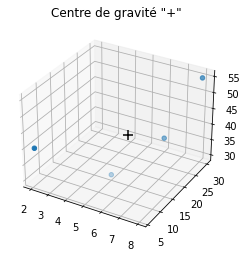

In [149]:
# Représentation de centre de gravité de nuage et nuage 3D
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.scatter(cgx, cgy, cgz, color='k', marker='+', s=100)
plt.title('Centre de gravité "+"')

In [150]:
#Matrice de Covariance
cov_matrix = df.cov()
cov_matrix

,Indice geographique,revenu,age
Indice geographique,7.000000,26.500000,14.166667
revenu,26.500000,104.250000,69.583333
age,14.166667,69.583333,106.250000


Appliction de ACP

In [151]:
#nombre d'observations
n = df.shape[0]
#nombre de variables
p = df.shape[1]
n, p

(4, 3)

In [152]:
#instanciation
sc = StandardScaler()
#transformation – centrage-réduction
z = sc.fit_transform(df)
z

array([[ 1.09108945,  1.32882932,  1.54030809],
       [-1.52752523, -1.38537525, -0.14002801],
       [-0.21821789, -0.36754854, -1.26025208],
       [ 0.65465367,  0.42409446, -0.14002801]])

In [153]:
#moyenne
np.mean(z,axis=0)


array([2.77555756e-17, 0.00000000e+00, 4.16333634e-17])

In [120]:
#écart-type
np.std(z,axis=0,ddof=0)

array([1., 1., 1.])

In [121]:
#instanciation de classe PCA
acp = PCA(svd_solver='full')
#calculs
coord = acp.fit_transform(z)
#nombre de composantes calculées
acp.n_components_

3

In [122]:
#variance expliquée
acp.explained_variance_

array([3.2796722 , 0.71574247, 0.00458534])

In [123]:
#valeur corrigée
eigval = (n-1)/n*acp.explained_variance_
eigval


array([2.45975415, 0.53680685, 0.003439  ])

In [124]:
#ou bien en passant par les valeurs singulières
acp.singular_values_**2/n


array([2.45975415, 0.53680685, 0.003439  ])

In [125]:
#proportion de variance expliquée
acp.explained_variance_ratio_


array([0.81991805, 0.17893562, 0.00114633])

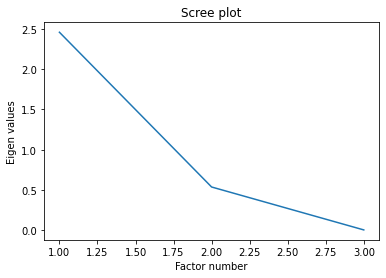

In [126]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()


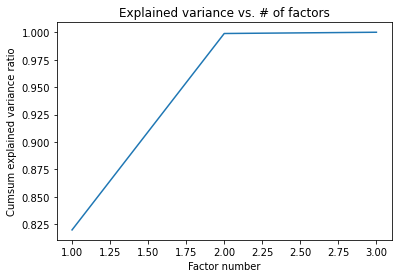

In [127]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()


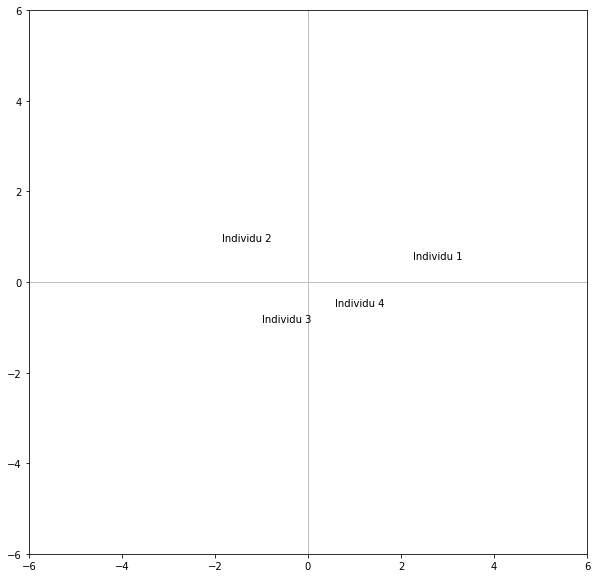

In [128]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-6,6) #même limites en abscisse
axes.set_ylim(-6,6) #et en ordonnée
#placement des étiquettes des observations
for i in range(n):
 plt.annotate(df.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()


In [129]:
#contribution des individus dans l'inertie totale
di = np.sum(z**2,axis=1)
pd.DataFrame({'ID':df.index,'d_i':di})


,ID,d_i
0,Individu 1,5.328813
1,Individu 2,4.272206
2,Individu 3,1.770946
3,Individu 4,0.628035


In [130]:
#qualité de représentation des individus - COS2
cos2 = coord**2
for j in range(p):
 cos2[:,j] = cos2[:,j]/di
pd.DataFrame({'id':df.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]})

,id,COS2_1,COS2_2
0,Individu 1,0.953082,0.046613
1,Individu 2,0.804550,0.195412
2,Individu 3,0.551452,0.446352
3,Individu 4,0.551599,0.435535


In [131]:
#vérifions la théorie - somme en ligne des cos2 = 1
np.sum(cos2,axis=1)

array([1., 1., 1., 1.])

In [133]:
#contributions aux axes
ctr = coord**2
for j in range(p):
 ctr[:,j] = ctr[:,j]/(n*eigval[j])

pd.DataFrame({'id':df.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]})

,id,CTR_1,CTR_2
0,Individu 1,0.516189,0.115680
1,Individu 2,0.349344,0.388799
2,Individu 3,0.099257,0.368133
3,Individu 4,0.035209,0.127388


In [135]:
np.sum(ctr,axis=0)

array([1., 1., 1.])

In [137]:
#le champ components_ de l'objet ACP
acp.components_

array([[ 0.59882492,  0.62770014,  0.49739446],
       [-0.46584663, -0.23218783,  0.85385932],
       [ 0.65145655, -0.74302177,  0.15337214]])

In [140]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
 corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]

#afficher la matrice des corrélations variables x facteurs
corvar

array([[ 0.93917325, -0.34131233,  0.03820338],
       [ 0.98446   , -0.17011729, -0.04357304],
       [ 0.78009375,  0.62559799,  0.00899421]])

In [141]:
#on affiche pour les deux premiers axes
pd.DataFrame({'id':df.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]})

,id,COR_1,COR_2
0,Indice geographique,0.939173,-0.341312
1,revenu,0.984460,-0.170117
2,age,0.780094,0.625598


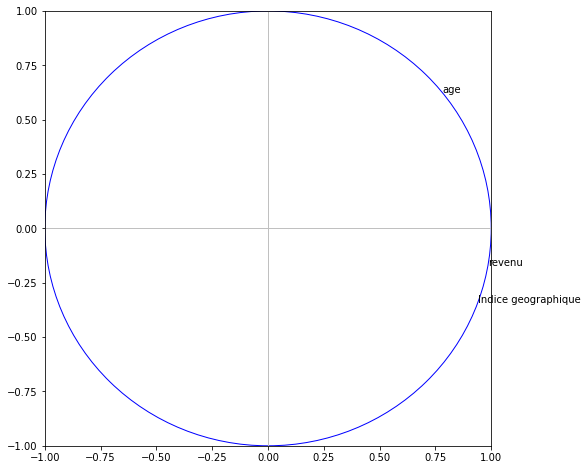

In [143]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
#affichage des étiquettes (noms des variables)
for j in range(p):
 plt.annotate(df.columns[j],(corvar[j,0],corvar[j,1]))

#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
#affichage
plt.show()